# SYDE 556/750 --- Assignment 4
**Student ID: 20854840**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_04/syde556_assignment_04.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import nengo and some helper functions for Q1
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.utils.connection import eval_point_decoding
import scipy.integrate as integrate
from matplotlib.collections import LineCollection
import matplotlib.cm as cm

seed = 189456

# Fix the numpy random seed for reproducible results
np.random.seed(seed)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Building an ensemble of neurons

**a) Tuning curves.** Plot the population tuning curves. Plot the representation accuracy plot ($x - \hat{x}$). Compute and report the RMSE.

In [2]:
# Helper for calculating rmse
def calc_rmse(x1, x2):
    return round(np.sqrt(np.mean((x1 - x2) ** 2)), 10)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

-------------------------------------
The RMSE for 100 neurons = 0.005387544969187615
-------------------------


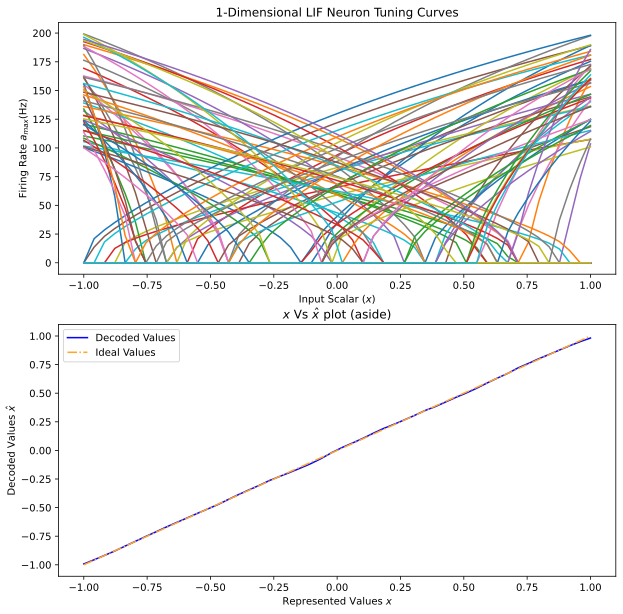

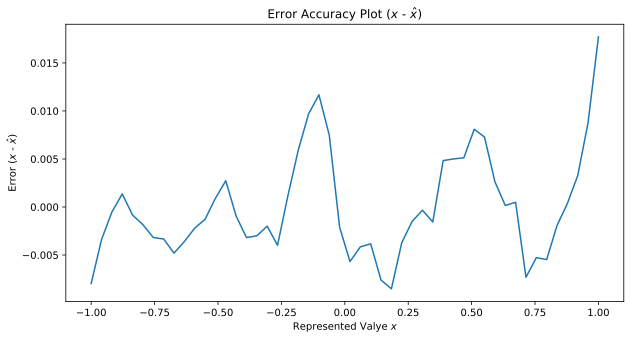

In [3]:
# Create constants for ensemble
num_neurons = 100
tau_ref, tau_rc = 0.002, 0.02
dim = 1
a_min, a_max = 100, 200
encoders = [-1,1]
# Create network of 1D Neurons for the ensmble with a seed
model = nengo.Network(label='1-Dim Ensemble', seed=seed)

# Create LIF rates with set Taus. Then create Ensemble of neurons with a dummy connection 
# to calculate decoded values 
lif = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)
with model:
    ensemble = nengo.Ensemble(n_neurons=num_neurons, 
        dimensions=dim, max_rates=nengo.dists.Uniform(a_min, a_max), 
        neuron_type=lif)
    
    connection = nengo.Connection(ensemble,ensemble)

# Reference simulator to be used to go against the ensemble to form the tuning curves.  
# Simulator providing information about the built ensemble
sim = nengo.Simulator(model)
x, A = tuning_curves(ensemble,sim)
# Plot tuning curves
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.set_title("1-Dimensional LIF Neuron Tuning Curves")
ax1.plot(x,A)
ax1.set_ylabel("Firing Rate $a_{max} $(Hz)")
ax1.set_xlabel("Input Scalar ($x$)")


# Using connection and simulation, calculate the evaluation points, decoded values and target values
eval_point, ideal, decoded = eval_point_decoding(connection, sim, x)

# Plot the Decoded values vs the Target (ideal) values
ax2.set_title("$x$ Vs $\hat x$ plot (aside)")
ax2.plot(eval_point, decoded, label="Decoded Values", color="xkcd:Primary Blue")
ax2.plot(eval_point,ideal, label="Ideal Values", color="xkcd:mango", linestyle="dashdot")
ax2.set_xlabel("Represented Values $x$")
ax2.set_ylabel("Decoded Values $\hat x$")
ax2.legend()

# Calculate the rror and plot them out
error = ideal-decoded
plt.figure(figsize=(10,5))
plt.title("Error Accuracy Plot ($x$ - $\hat x$)")
plt.plot(eval_point, error)
plt.xlabel("Represented Valye $x$")
plt.ylabel("Error ($x$ - $\hat x$)")
# print(ideal.shape)
# print(decoded.shape)
# print(error.shape)

# Calculate RMSE
rmse_LIF = nengo.utils.numpy.rmse(ideal,decoded)
print("-------------------------------------")
print("The RMSE for 100 neurons =", str(rmse_LIF))
print("-------------------------")

**b) RMSE and radius.** Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Make sure your neurons have the same (relative, i.e., scaled by the radius) $x$-intercepts and maximum rates across all experiments.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE for 100 Neurons with Radius0.5------
0.0026937724845938074
--------------------------------------------
RMSE for 100 Neurons with Radius1------
0.005387544969187615
--------------------------------------------
RMSE for 100 Neurons with Radius2------
0.01077508993837523
--------------------------------------------
RMSE for 100 Neurons with Radius4------
0.02155017987675046
--------------------------------------------


Text(0, 0.5, 'RMSE values')

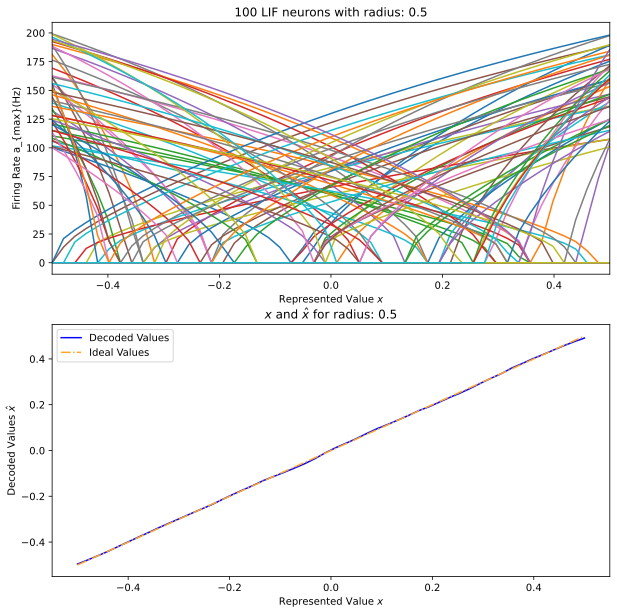

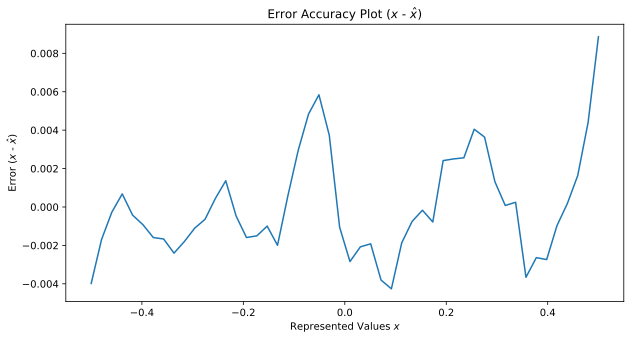

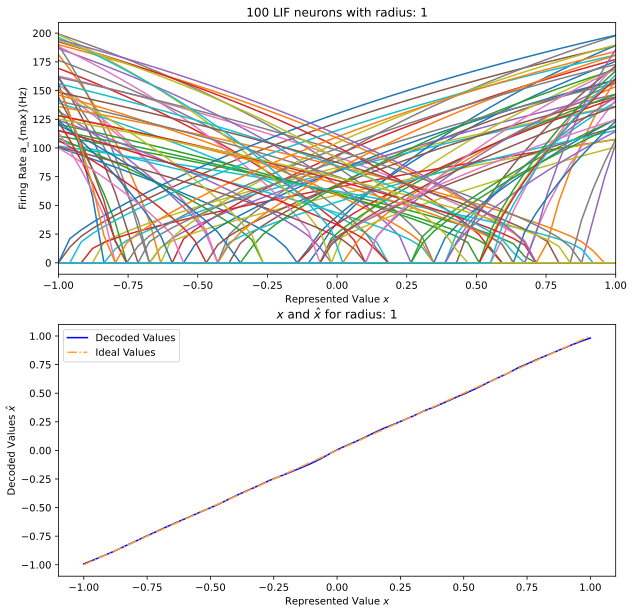

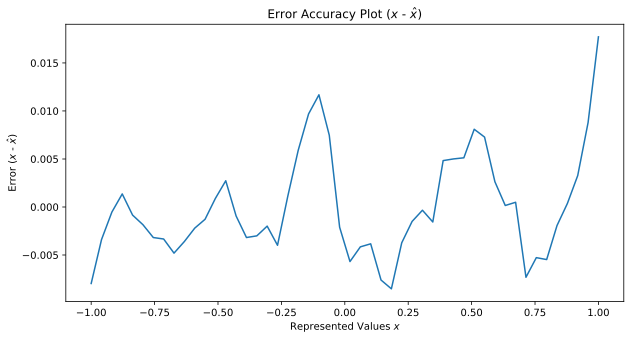

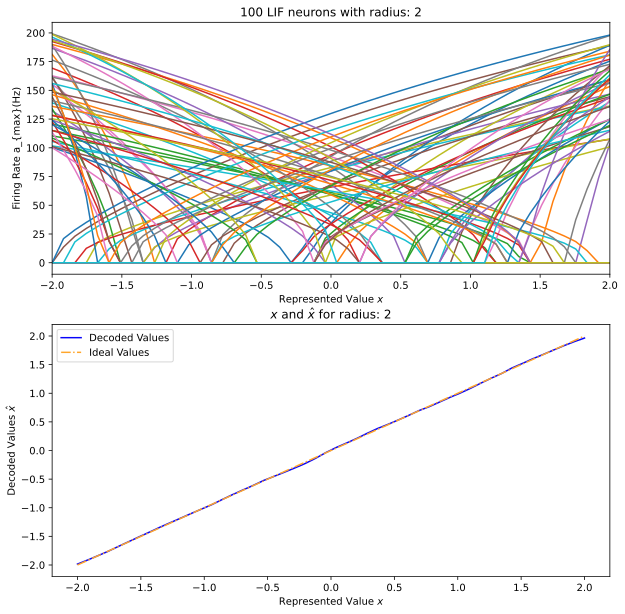

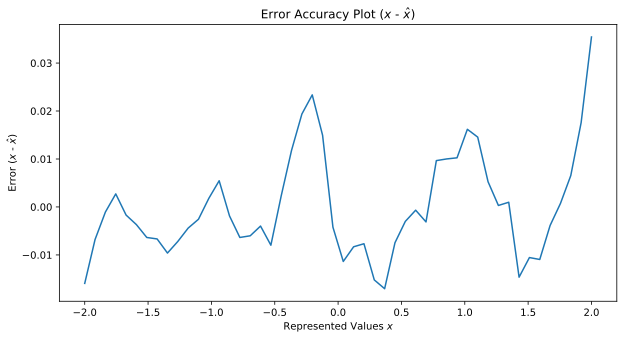

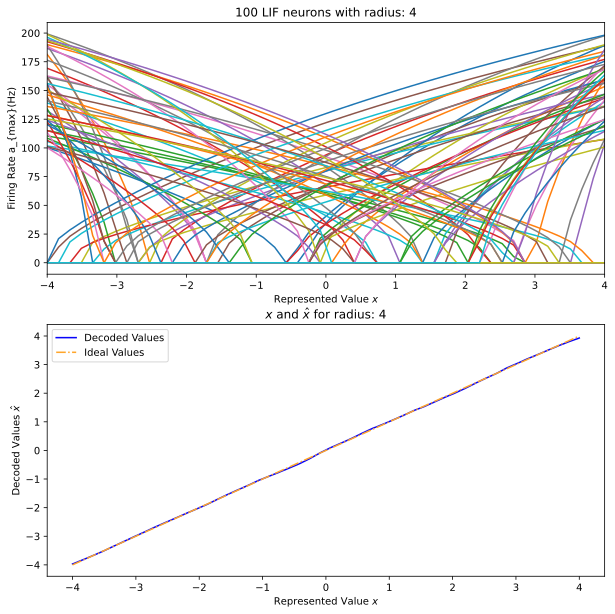

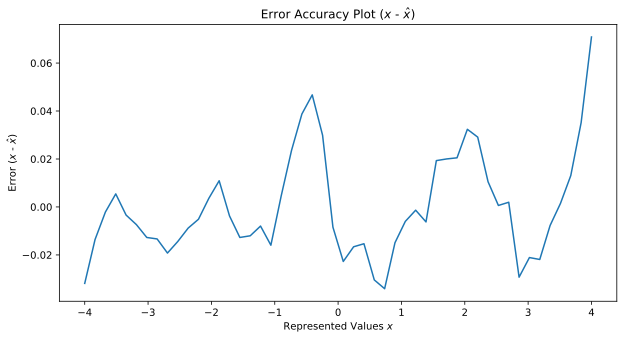

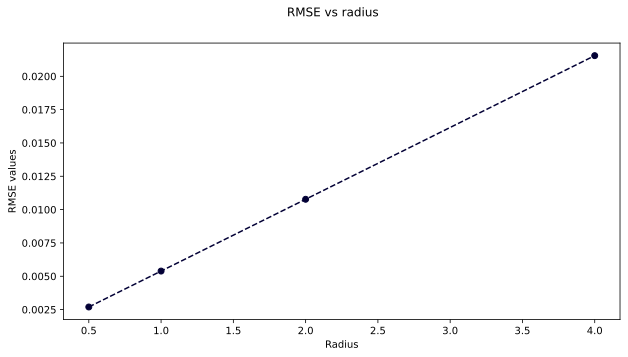

In [4]:
# Init Radii to be used

radii = [0.5, 1, 2, 4]
error = []
errors = []
e_rmse = []
for radius in radii:
    ensemble.radius = radius # Fetch radius for each ensemble
    
    simulation = nengo.Simulator(model) # Create simulation for each radius
    
    # Plot Tuning curves for LIF neuron ensemble
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
    ax1.set_title("100 LIF neurons with radius: " + str(radius))
    x,A = tuning_curves(ensemble, simulation)
    ax1.plot(x,A)
    ax1.set_xlabel("Represented Value $x$")
    ax1.set_ylabel("Firing Rate a_{max}(Hz)")
    ax1.set_xlim([-radius, radius])
    
    # # Calculate decoded values as well as ideal values with evaluation points
    # # Plot them right after they are calculated
    eval_points, ideal, decoded = eval_point_decoding(connection, simulation,x)
    error = ideal-decoded
    
    ax2.set_title("$x$ and $\hat{x}$ for radius: " + str(radius))
    ax2.plot(eval_points, decoded, label="Decoded Values", color="xkcd:Primary Blue")
    ax2.plot(eval_points, ideal, label="Ideal Values", color="xkcd:mango", linestyle="dashdot")
    ax2.set_xlabel("Represented Value $x$")
    ax2.set_ylabel("Decoded Values $\hat x$")
    ax2.legend()
    
    # Calculate RMSE for the ideal and decoded values
    rmse_err = nengo.utils.numpy.rmse(ideal, decoded)

    # Append related reults or the RMSE to be plotted and printed later
    ob = {"rmse": rmse_err, "radius": radius}
    errors.append(ob)
    e_rmse.append(rmse_err)
    plt.figure(figsize=(10,5))
    plt.plot(eval_points,error)
    plt.title("Error Accuracy Plot ($x$ - $\hat x$)")
    plt.xlabel("Represented Values $x$")
    plt.ylabel("Error ($x$ - $\hat x$)")

# Print RMSE block for each of the radii's errors
for error in errors:
    print("RMSE for 100 Neurons with Radius" + str(error["radius"]) + "------")
    print(error["rmse"])
    print("--------------------------------------------")

plt.figure(figsize=(10,5))
plt.suptitle("RMSE vs radius")
plt.plot(radii, e_rmse, "o--", color="xkcd:midnight blue")
plt.xlabel("Radius")
plt.ylabel("RMSE values")

**c) Discussion.** What mathematical relationship between the radius and the RMSE do you observe (write down an equation)? Explain why this is the case.

The RMSE vs radii evidently has a linear relationship. Hence we could estimate the equation using the RMSE values for each radii.

Let $E(r)$ be some linear function that follows the trend in the plot above. So then, using the basic straight line equation:

$$ E(r) = mr + b $$

where,

$$m => Slope, b => Intercept $$

Now $$(r_1, E_1) = (0.5,E_1)$$ $$(r_2, E_2) = (4,E_2)$$

So then,

$$m = \frac{E_2-E_1}{r_2-r_1} $$

$$b = \frac{r_2 * E_1- r_1 * E_2}{r_2-r_1} $$

which gives us the equation displayed in the calculator below. In the end, for a set of given end and starting points of the line, the equation should be:

$$ E_{RMSE} = \alpha*r+\gamma $$

for some constant slope and intercept $\alpha$ and $\gamma$ respectively


This linear relationship is due to the fact that there is much more space as the radii increases, which means more neurons are present, which means more error there is to the system. Or simply, as the radius of the neurons increases the error should increase as the same number of neurons must cover a larger state space.




In [5]:
"""

!!!!!!!!!!! CALCULATOR FOR EQUATION GENERERATION !!!!!!!!!

"""

# Helper calcs cause lol I dont wanna use my calculator.

r1, r2 = 0.5, 4
E1, E2 = errors[0]["rmse"], errors[-1]["rmse"]

m = (E2 - E1) / (r2 - r1)
b = ((r2 * E1) - (r1 * E2)) / (r2 - r1)

# Print errors
print("Error 1 =", E1)
print("Error 2 =", E2)

# Print values
print("Slope =", m)
print("Intercept =", b)

# Print the final equation
print("\n------------------------------------------------------------")
print("So the final equation is:")
print("E_RMSE =", str(m) + "r +" + str(b))
print("-----------------------------------")



Error 1 = 0.0026937724845938074
Error 2 = 0.02155017987675046
Slope = 0.005387544969187615
Intercept = 0.0

------------------------------------------------------------
So the final equation is:
E_RMSE = 0.005387544969187615r +0.0
-----------------------------------


**d) RMSE and refractory period.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{ref}$ changes between $1$ and $5\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{ref}$ and produce a plot showing the RMSE over $\tau_\mathrm{ref}$. Again, make sure to use the same neuron ensemble parameters in all your trials.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE for 100 neurons with $\tau_{ref}$0.001------
0.0046706193
--------------------------------------------
RMSE for 100 neurons with $\tau_{ref}$0.002------
0.0050894672
--------------------------------------------
RMSE for 100 neurons with $\tau_{ref}$0.003------
0.0057832732
--------------------------------------------
RMSE for 100 neurons with $\tau_{ref}$0.0035------
0.0062672769
--------------------------------------------
RMSE for 100 neurons with $\tau_{ref}$0.004------
0.0068824427
--------------------------------------------
RMSE for 100 neurons with $\tau_{ref}$0.005------
0.009602048
--------------------------------------------


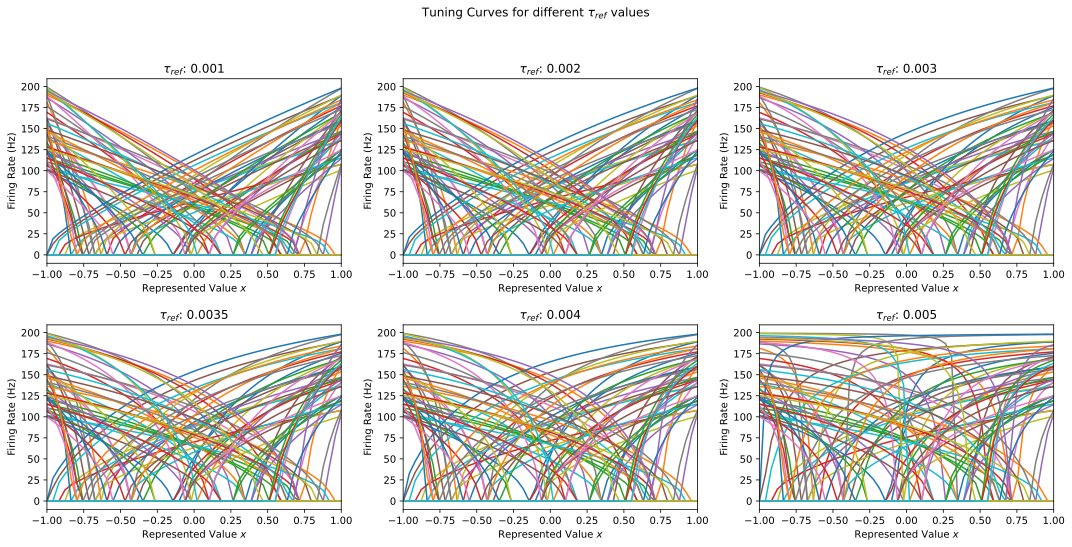

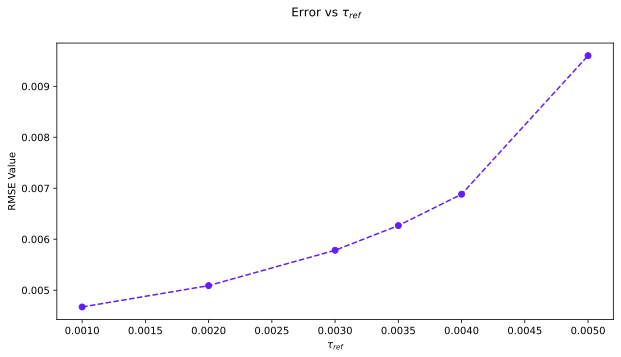

In [6]:
tau_refs = [0.001, 0.002, 0.003, 0.0035, 0.004, 0.005]
tau_rc = 0.02
dimensions = 1
encoders = [-1, 1]
errors = []
e_rs = []

# Create a big plot with tuning curves as subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Tuning Curves for different $\\tau_{ref}$ values")

# Reuse the simulator


for i, tau_ref in enumerate(tau_refs):
    model = nengo.Network(label="1-Dim Ensemble", seed=seed)
    lif = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)
    
    with model:
        ensemble = nengo.Ensemble(
            n_neurons=num_neurons,
            dimensions=dimensions,
            max_rates=nengo.dists.Uniform(100, 200),
            neuron_type=lif,
        )
        connection = nengo.Connection(ensemble, ensemble)

    simulation = nengo.Simulator(model)

    # Use the subplot for the current iteration
    ax = axes[i // 3, i % 3]
    ax.set_title("$\\tau_{ref}$: " + str(tau_ref))

    # Assuming tuning_curves and eval_point_decoding are already defined elsewhere
    inputs, tuning = tuning_curves(ensemble, simulation)
    ax.plot(inputs, tuning, label=f'$\\tau_{{ref}}$={tau_ref}')

    ax.set_xlabel("Represented Value $x$")
    ax.set_ylabel("Firing Rate (Hz)")
    ax.set_xlim([-1, 1])

    eval_points, ideal, decoded = eval_point_decoding(connection, simulation)
    rmse_err = calc_rmse(ideal, decoded)

    ob = {"rmse": rmse_err, "tau_ref": tau_ref}
    errors.append(ob)

for error in errors:
    print("RMSE for 100 neurons with $\\tau_{ref}$" + str(error["tau_ref"]) + "------")
    print(error["rmse"])
    print("--------------------------------------------")

# Display the plot with a common legend
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plotting RMSE values
plt.figure(figsize=(10, 5))
plt.suptitle("Error vs $\\tau_{ref}$")
plt.plot([error["tau_ref"] for error in errors], [error["rmse"] for error in errors], "o--", color="xkcd:purplish blue")
plt.xlabel("$\\tau_{ref}$")
plt.ylabel("RMSE Value")
plt.show()


**e) RMSE and membrane time constant.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{RC}$ changes between $10$ and $100\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{RC}$ and produce a plot showing the RMSE over $\tau_\mathrm{RC}$.  Again, make sure to use the same neuron ensemble parameters in all your trials.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE for 100 neurons with $\tau_{RC}$0.01------
0.0061657491
--------------------------------------------
RMSE for 100 neurons with $\tau_{RC}$0.025------
0.0048376365
--------------------------------------------
RMSE for 100 neurons with $\tau_{RC}$0.05------
0.0042779863
--------------------------------------------
RMSE for 100 neurons with $\tau_{RC}$0.06------
0.004176243
--------------------------------------------
RMSE for 100 neurons with $\tau_{RC}$0.08------
0.004045729
--------------------------------------------
RMSE for 100 neurons with $\tau_{RC}$0.1------
0.0039659118
--------------------------------------------


Text(0, 0.5, 'RMSE Value')

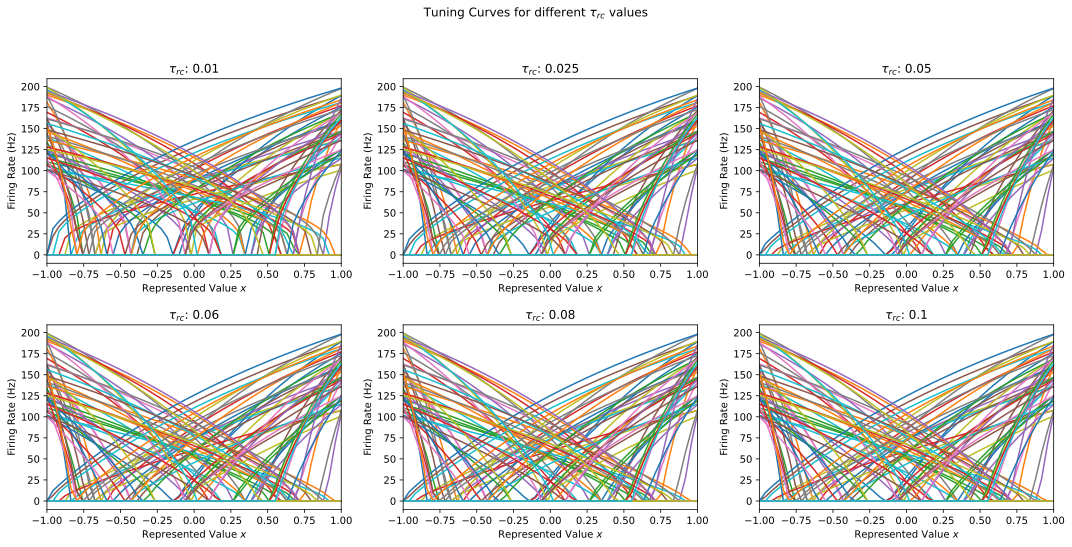

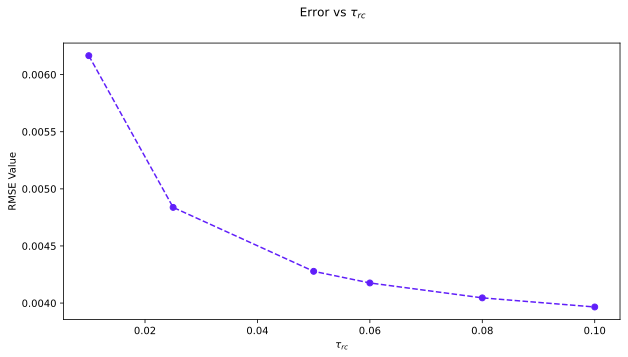

In [7]:
tau_rcs = [10 / 1000, 25 / 1000, 50 / 1000, 60/1000, 80 / 1000, 100 / 1000] # Added more sample points to make the resolution better
n = 100
tau_ref = 2 / 1000
dimensions = 1
encoders = [-1, 1]

errors = []
e_rs = []

# Create a big plot with tuning curves as subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Tuning Curves for different $\\tau_{rc}$ values")

for i, tau_rc in enumerate(tau_rcs):
    model = nengo.Network(label="1-Dim Ensemble", seed=seed)
    lif = nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref)
    
    with model:
        ens = nengo.Ensemble(
            n_neurons=n,
            dimensions=dimensions,
            max_rates=nengo.dists.Uniform(100, 200),
            neuron_type=lif,
        )
        connection = nengo.Connection(ens, ens)

    simulation = nengo.Simulator(model, optimize=True)
    
    # Use the subplot for the current iteration
    ax = axes[i // 3, i % 3]
    ax.set_title("$\\tau_{rc}$: " + str(tau_rc))
    
    ax.plot(*tuning_curves(ens, simulation), label=f'$\\tau_{{rc}}$={tau_rc}')  # Transpose the tuning curves here
    
    ax.set_xlabel("Represented Value $x$")
    ax.set_ylabel("Firing Rate (Hz)")
    ax.set_xlim([-1, 1])

    eval_points, ideal, decoded = eval_point_decoding(connection, simulation)
    rmse_err = calc_rmse(ideal, decoded)

    ob = {"rmse": rmse_err, "tau_rc": tau_rc}
    errors.append(ob)
    e_rs.append(rmse_err)

# Display the plot with a common legend
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


for error in errors:
    print("RMSE for 100 neurons with $\\tau_{RC}$" + str(error["tau_rc"]) + "------")
    print(error["rmse"])
    print("--------------------------------------------")

plt.figure(figsize=(10,5))
plt.suptitle("Error vs $\\tau_{rc}$")
plt.plot(tau_rcs, e_rs, "o--", color="xkcd:purplish blue")
plt.xlabel("$\\tau_{rc}$")
plt.ylabel("RMSE Value")



**f) Discussion.** Discuss the last two results. Describe what happens to the tuning curves as $\tau_\mathrm{ref}$ and $\tau_\mathrm{RC}$ change (you do not need to come up with a mathematical relationship here). Explain why the change in tuning curve shape influences the RMSE in the way you observe.

In terms of the tuning curves, the curves seem to stay the at or near the maximum firing rate over a wider set of represented values when $\tau_{ref}$ increases (or is high). Another thing we can see is that the as the value for $\tau_{ref}$ increases, the minimum rate of firing also increases. In contrast to this, as $\tau_{rc}$ increases, the max firing rate stays the same, but the minimum rate of firing increases.

As $\tau_{ref}$ increases we can see that that the RMSE increases in what appears to be an exponential nature. This is likely due the fact that the refractory period is limiting the rate at which the neurons can spike so as we increase the period, we would expect to see an increase in information loss in the signal because the neurons can't fire at a rate at that preserves much of the input signal.

In the case of  $\tau_{rc}$  we can see that the RMSE decreases exponentially and decays as $\tau_{rc}$ increases. This is because at low values, neurons get excited very quickly and this can cause them to fire at incorrect times increasing noise in the neuron's output.

# 2. Connecting neurons

**a) Computing the identity function.** Show the input value and the decoded values from the two  ensembles in three separate plots. Run the simulation for $0.5\,\mathrm{s}$.

In [8]:
def identity(channel_function):
	global seed
	#ensemble parameters
	N=50
	N_1 = 100
	dimensions=1
	tau_rc=0.02
	tau_ref=0.002
	noise=0.1
	T=0.5
	seed=seed

	lif_model=nengo.LIF(tau_rc=tau_rc,tau_ref=tau_ref)

	model=nengo.Network(label='Communication Channel')

	with model:
		# stimulus 1 for 0.1<t<0.4 and zero otherwise
		stimulus=nengo.Node(output=lambda t: 0+ 1.0*(0.1<t<0.4))

		# Create ensembles
		ensemble_1=nengo.Ensemble(N_1,dimensions,
							intercepts=nengo.dists.Uniform(-1,1),
							max_rates=nengo.dists.Uniform(100,200),
							neuron_type=lif_model)
		ensemble_2=nengo.Ensemble(N,dimensions,
							intercepts=nengo.dists.Uniform(-1,1),
							max_rates=nengo.dists.Uniform(100,200),
							neuron_type=lif_model)

		# Connect stimulus to ensemble_1
		stimulation=nengo.Connection(stimulus,ensemble_1)

		# Create communication channel between ensemble 1 and 2
		channel=nengo.Connection(ensemble_1,ensemble_2, function=channel_function, #identity
							synapse=0.01  #10ms postsynaptic filter
							# solver=nengo.solvers.LstsqNoise(noise=noise)
							)

		# Probe the decoded values from the two ensembles
		probe_stim=nengo.Probe(stimulus)
		probe_ensemble_1=nengo.Probe(ensemble_1, synapse=0.01)
		probe_ensemble_2=nengo.Probe(ensemble_2, synapse=0.01)

	# Run the model
	sim=nengo.Simulator(model,seed=seed)
	sim.run(T)

	# Plot required values
	fig=plt.figure(figsize=(12,8))
	ax=fig.add_subplot(221)
	ax.set_title("Step input $x(t)$")
	ax.plot(sim.trange(),sim.data[probe_stim],label='stimulus', color="xkcd:neon red")
	ax.set_xlabel('Time (s)')
	ax.set_ylabel('Signal Output')
	ax.legend(shadow=True)

	ax=fig.add_subplot(222)
	ax.set_title("Decoded output from Ensemble 1")
	ax.plot(sim.trange(),sim.data[probe_ensemble_1],label='ensemble 1', color="xkcd:pinky purple")
	ax.set_xlabel('Time (s)')
	ax.set_ylabel('Signal Output')
	ax.legend(shadow=True)

	ax=fig.add_subplot(223)
	ax.set_title("Decoded output from Ensemble 2")
	ax.plot(sim.trange(),sim.data[probe_ensemble_2],label='ensemble 2', color="xkcd:mango")
	ax.set_xlabel('Time (s)')
	ax.set_ylabel('Signal Output')

	ax=fig.add_subplot(224)
	ax.set_title("Putting it all together!")
	ax.plot(sim.trange(),sim.data[probe_stim],label='stimulus', color="xkcd:neon red", linestyle="dashed")
	ax.plot(sim.trange(),sim.data[probe_ensemble_1],label='ensemble 1', color="xkcd:pinky purple")
	ax.plot(sim.trange(),sim.data[probe_ensemble_2],label='ensemble 2', color="xkcd:mango")
	ax.set_xlabel('Time (s)')
	ax.set_ylabel('Signal Output')
	ax.legend(shadow=True)
	
	plt.tight_layout(pad=0.5)
	plt.show()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

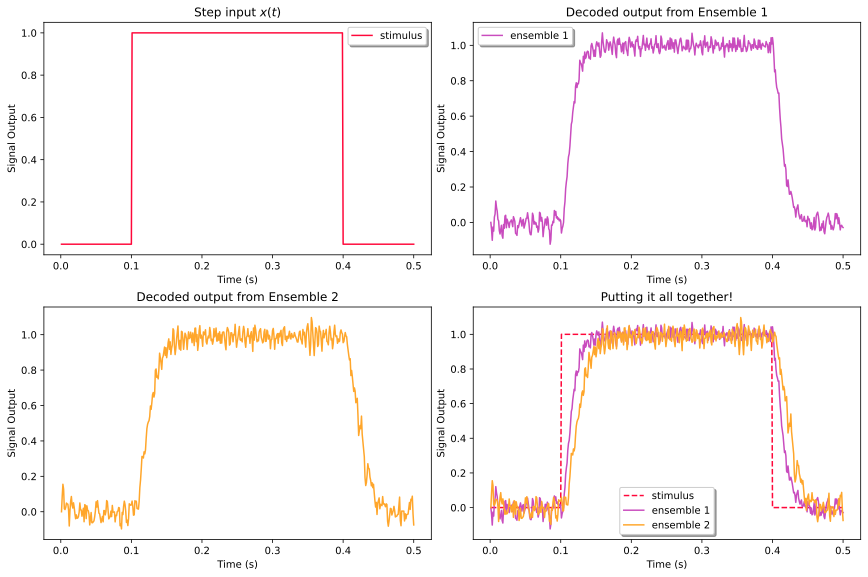

In [9]:
channel_function = lambda x : x
identity(channel_function=channel_function)


**b) Computing an affine transformation.** Make a new version of the model where instead of computing the identity function, it computes $y(t) = 1 - 2x(t)$. Show the same graphs as in part (a).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

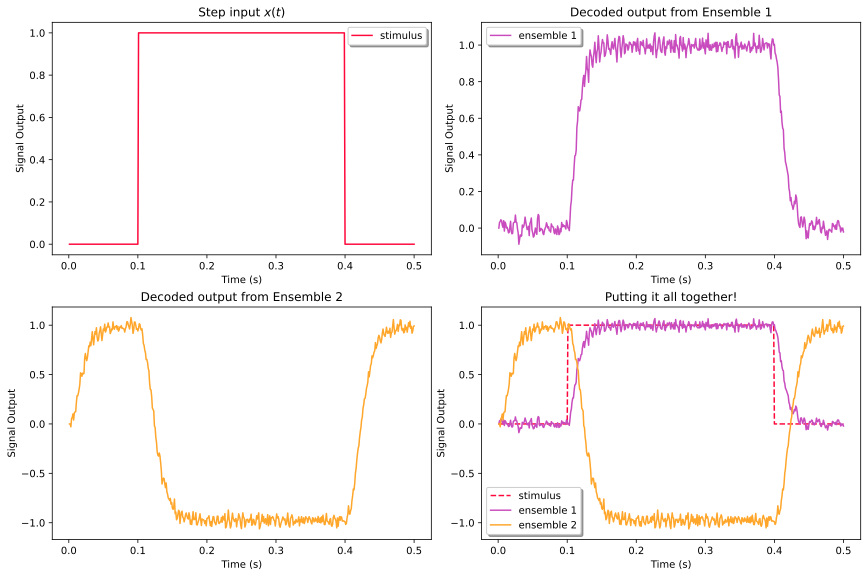

In [10]:
channel_function = lambda x: 1-2*x
identity(channel_function)

# 3. Dynamics

**a) Transforming the dynamical system.** Rewrite the linear dynamical system describing the integrator in terms of $\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}$, i.e., write down the matrices $\mathbf{A}$ and $\mathbf{B}$ (you can just use the equations from class, you do not have to re-derive the equations) What are the matrices $\mathbf{A}'$ and $\mathbf{B}'$ we have to use when implementing this system using the recurrent connection post-synaptic filter?

An integrator is defined as the following dynamical system:

$$ \frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u} $$

$$=> \tag{1} \frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \bold{Ax} + \bold{Bu} $$

We also know that the matrices $\bold{A}$ and $\bold{B}$ in the LTI dynamical system are given as follows:

$$\bold{A} = \frac{1}{\tau}(A'-I) $$

$$\bold{B} = \frac{1}{\tau}(B') $$

Re-arranging these we get:

$$\tag{2} \bold{A'} = \tau \bold{A} + I $$
$$\tag{3} \bold{B'} = \tau \bold{B} $$

Now in the case of the integrator, $\bold{A} = 0$ and $\bold{B} = I$. So then from $(1)$, $(2)$ and $(3)$ become

$$\tag{4} \bold{A'} =  I $$
$$\tag{5} \bold{B'} = \tau I $$







**b) Integrator using spiking neurons.**  Show the input, the ideal integral, and the value represented by the ensemble when the input is a value of $0.9$ from $t=0.04$ to $t=1.0$ (and $0$ for other times). Run the simulation for $1.5\,\mathrm{s}$.

In [11]:
def integrator(stim_function,neuron_type='spike', title="Neural Integrator"):
	global seed
	# Neuron ensemble parameters
	N=200
	dimensions=1
	tau_rc=0.02
	tau_ref=0.002
	tau_feedback=0.05
	tau_input=0.005
	tau_probe = 0.01
	noise=0.1
	T=1.5
	radius=1
	seed=18945

	if neuron_type == 'spike':
		lif_model=nengo.LIF(tau_rc=tau_rc,tau_ref=tau_ref)
	elif neuron_type == 'rate':
		lif_model=nengo.LIFRate(tau_rc=tau_rc,tau_ref=tau_ref)

	model=nengo.Network(label='Communication Channel')

	with model:
		stimulus=nengo.Node(output=stim_function)

		integrator=nengo.Ensemble(N,dimensions,
							radius=radius,                                  
							intercepts=nengo.dists.Uniform(-1,1),
							max_rates=nengo.dists.Uniform(100,200),
							neuron_type=lif_model)

		# Define feedforward transformation <=> transform=tau
		def feedforward(u):
			return tau_feedback*u

		stimulation=nengo.Connection(stimulus,integrator,
							function=feedforward,
							#transform=tau_feedback,
							synapse=tau_input)

		# Define recurrent transformation for the neurons
		def recurrent(x):
			return 1.0*x

		# Create recurrent connection
		channel=nengo.Connection(integrator,integrator,
							#function=recurrent,
							synapse=tau_feedback,
						)

		# Probes to capture data
		probe_stimulus=nengo.Probe(stimulus)
		probe_integrator=nengo.Probe(integrator,synapse=tau_probe)

	#run the model
	sim=nengo.Simulator(model,seed=seed)
	sim.run(T)

	#calculated expected (ideal) using scipy.integrate
	ideal=[integrate.quad(stim_function,0,T)[0] 
		for T in sim.trange()]

	#plot input and integrator value
	fig=plt.figure(figsize=(12,8))
	ax=fig.add_subplot(111)
	ax.set_title(title)
	ax.plot(sim.trange(),sim.data[probe_stimulus],label='stimulus', linestyle="dashed", color="xkcd:yellowish orange")
	ax.plot(sim.trange(),sim.data[probe_integrator],label='integrator', color="xkcd:bright aqua")
	ax.plot(sim.trange(),ideal,label='ideal', linestyle="dashdot", color="xkcd:fuchsia")
	ax.set_xlabel("Time (s)")
	ax.set_ylabel('Signal Value')
	# ax.set_ylim(0,1)
	ax.legend(shadow=True)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

/var/folders/vx/4n9y5hq95dj5b30w8b75ms1h0000gn/T/ipykernel_25707/642382101.py:60: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ideal=[integrate.quad(stim_function,0,T)[0]


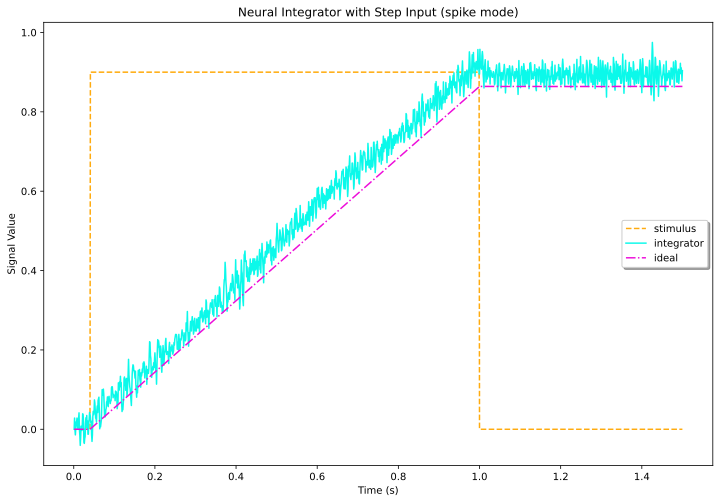

In [12]:
stimuli_func = lambda t: 0.9*(0.04<t<1.0)
integrator(stimuli_func,neuron_type="spike", title="Neural Integrator with Step Input (spike mode)")


**c) Discussion.** What is the expected ideal result, i.e., if we just mathematically computed the integral of the input, what is the equation describing the integral? How does the simulated output compare to that ideal?

The expected result (actually a close numerical approximation of it) is plotted in red. This value corresponds to finding the integral of the differential equation describing the value stored in the integrator ensemble over all time. The general form of this differential equation can be written using control theory:

$$\dot{x} = Ax + Bu$$

where $x$ is the represented state variable, $u$ is the input, $A$ is the feedback matrix, and $B$ is the input matrix. In this case, $x$ and $u$ are one-dimensional, and the integrator merely accumulates the value of its input ($A=0$ as in the eye control example in Lecture 2), so this equation reduces to

$$\dot{x} = u =
    \begin{cases}
        0.9 \quad &0.04<t<1.0 \\ 
        0 &otherwise 
    \end{cases}
$$

Integrating to find x(t), we get

$$x(t) = \int_0^T u dt = 
    \begin{cases}
        0 \quad &T<0.04 \\ 
        \int_{0.04}^{T} 0.9 dt = 0.9(T-0.04) &0.04<T<1.0 \\
        \int_{0.04}^{1.0} 0.9 dt = 0.864 &T>1.0
    \end{cases}
$$

The simulation results exhibit an almost perfect estimation of the ideal values, until it reaches the threshold/the ramp input being removed, where it starts to normalize to the final value (as calculated above). This may change with other seeds because there might some values that the approximation will actually have the value hold, otherwise there are some values that are either over or under estimated/approximated

**d) Simulation using rate neurons.** Change the neural simulation to rate mode. Re-run the simulation in rate mode. Show the resulting plots.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

/var/folders/vx/4n9y5hq95dj5b30w8b75ms1h0000gn/T/ipykernel_25707/642382101.py:60: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ideal=[integrate.quad(stim_function,0,T)[0]


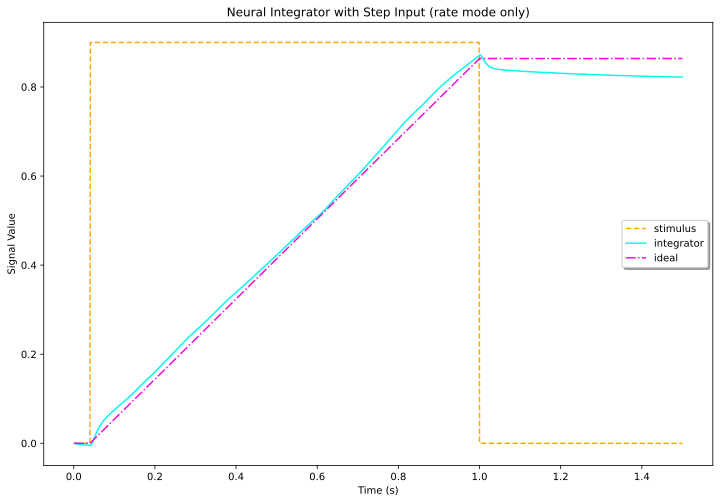

In [13]:
integrator(stimuli_func,neuron_type="rate", title="Neural Integrator with Step Input (rate mode only)")

**e) Discussion.** How does this compare to the result in part (b)? What deviations from the ideal do you still observe? Where do those deviations come from?

While adding the LIFRate() seems to run the simulation in rate mode seems to have signifnicantly decreased the amount of noise in the simulation. The discernible distinction lies in a significant reduction in noise. Notably, the neural integrator exhibits a tendency to overestimate the ideal duration during the course of the step; however, upon completion of the step, there appears to be an inclination towards underestimation (This is likely because there is inevitably some information that is lost when the signal undergoes filtering stage).In this case, and for this specifc seed value, the underestimation eventually converges to the final ideal value. However, this is not aloways the case as changing the seed to something else yields the latter (that the underestimation infact does occur). It must be known that the degree of stochasticity in this phenomenon is attributed to the inherent randomness in the generation of neurons within the ensembles (by virtue of the seed value). 

The underlying cause of these deviations is ostensibly rooted in the variance of time constant values. It stands to reason that, given the lower time constant for input compared to the post-synaptic time constant of the recurrent connection, the output value from the neural integrator experiences accelerated accumulation, resulting in overestimation. This conjecture can be confirmed through experimentation, where aligning the input time constant with that of the recurrent connection yields a more accurate estimate. Conversely, augmenting the input time constant initiates a trend towards underestimation during the ramp period.

**f) Integration of a shorter input pulse.** Returning to spiking mode, change the input to be a value of $0.9$ from $t=0.04$ to $0.16$. Show the same plots as before (the input, the ideal, and the value represented by the ensemble over $1.5\,\mathrm{s}$).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

/var/folders/vx/4n9y5hq95dj5b30w8b75ms1h0000gn/T/ipykernel_25707/642382101.py:60: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ideal=[integrate.quad(stim_function,0,T)[0]


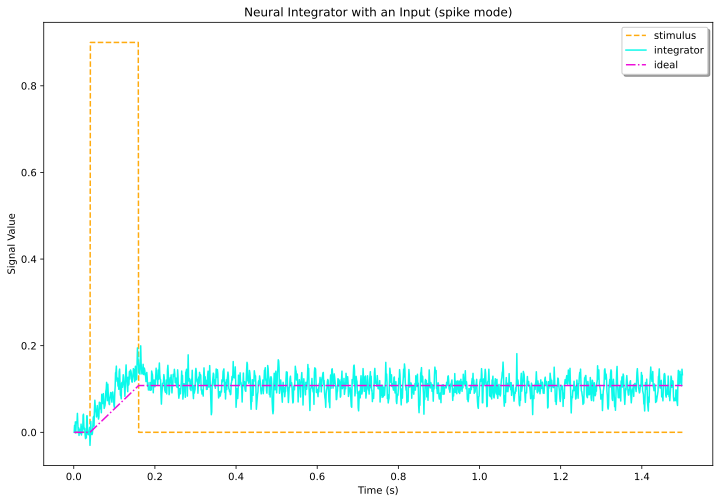

In [14]:
stimuli_func = lambda t: 0.9*(0.04<t<0.16)
integrator(stimuli_func,neuron_type="spike", title="Neural Integrator with an Input (spike mode)")

**g) Discussion.** How does this compare to (b)? What is the ideal equation? Does it work as intended? If not, why is it better or worse?

In the above case, the integrator performs significantly worse, with a huge underestimation. This is likely due to the fact that the integrator is bound by it's neuron's max firing rates and refractory periods. As a result, the integrator can't "fire fast enough" to represent the signal before the step function is "turned off".

A couple of notable things can also be observed in terms of comparing to b). The first is that for different random seeds, the steady state value of this neural integrator seems to alternate quite often between over and underestimating the actual ideal value or in this case it actually settles to the ideal values. Obviously these integrators also don't build up to near the input value but that was simply a quirk of the step being approximately 1 second long in the previous examples. I would say that this neural integrator generally works as expected and has similar "leaky effect" to the previous examples (where the values seem to drift off the ideal values after the input is effectively switched off), although it is more visible in this case because we are examining the steady state situation over a longer period of time, and the drift appears more noticeable because the relative steady state value of the ideal integrator is smaller.

**h) Input ramp.** Change the input to a ramp input from $0$ to $0.9$ from $t=0$ to $t=0.45$ (and $0$ for $t>0.45$). Show the same plots as in the previous parts of this question.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

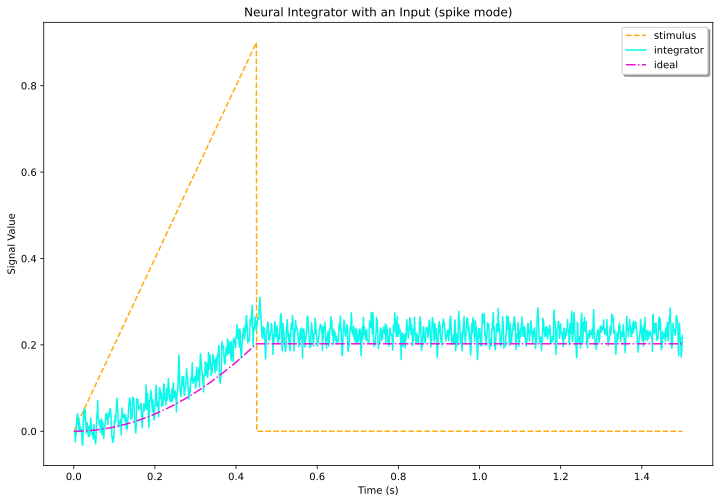

In [15]:
stimuli_func = lambda t: 2.0*t*(0.0<=t<=0.45)
integrator(stimuli_func,neuron_type="spike", title="Neural Integrator with an Input (spike mode)")

**i) Discussion.** What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?

The output looks like a qudratic function over the regions for which the ramp input $x(t)=2t$ is increasing, and then levels off/stays constant when $x(t)=0$ after 0.45 seconds. This is exactly what we expect to see since the integral of a linear function is quadratic, indicating that the model is in fact calculating an integral/ is behaving like an integrator. It does once again reveal the limitations of the firing rate of the neurons in representing inregrals on small timescales. We again see that:

The ideal equation is as follows
so if  $0 \lt t \leq 0.45$
$$
\int_{0}^{t} u(t')dt' = t^2
$$
if $ 0.45 \lt t$
$$
\int_{0}^{t} u(t')dt' = [t^2]_{0}^{0.45} = 0.2025

$$

The output also looks noisy, which probably means that the inherent noise from the spiking mode is present while calculating the feedback.

**j) Sinusoidal input.** Change the input to $5\sin(5t)$. Show the same plots as before.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

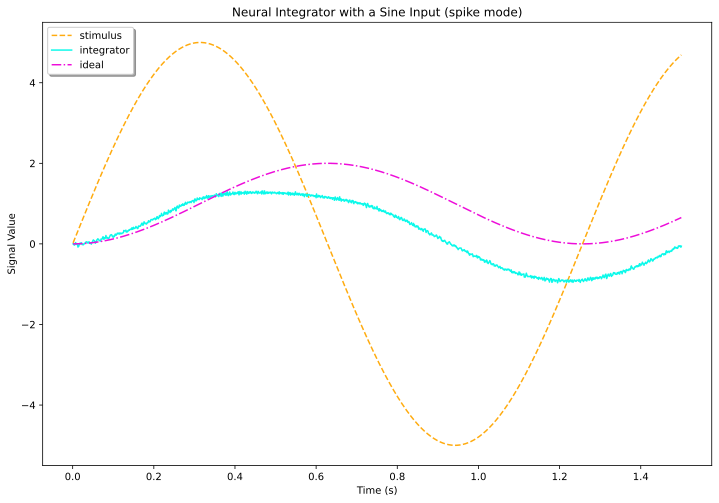

In [16]:
stim_function = lambda t: 5*np.sin(5*t)
stim_func = lambda t: 5.0*np.sin(5.0*(t+np.pi/2))
integrator(stim_function,neuron_type="spike", title="Neural Integrator with a Sine Input (spike mode)")
# integrator(stim_func,neuron_type="spike", title="Neural Integrator with a Sine Input (spike mode, but 90 degs out of phase)")

**k) Discussion.** What should the value represented by the ensemble be? Write the equation. How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour and why do these differences occur?

The integrator should ideally follow the equation:

$$\dot{x} = u = \int_{0}^{T} 5\sin(5t) dt  = 1-\cos(5T)$$

The model does an okay job although it does seem further off the ideal behaviour than in previous examples. More intrestingly, the model seems to follow the ideal values initially and then quite quickly begins approximating -cos(5T) instead of 1-cos(5T). This becomes significantly more visible if you increase the duration of the simulation to something like 5s. This seems to quite clearly be related to the radius values of the neurons (the neurons are saturating at +1 and then attempting to follow the curve from there, resulting in a down shifted cos function). This hypothesis is confirmed by increasing the radius of the neurons to 2, which results in them approximating the ideal integrator very well!

**l) 🌟 Bonus question.** Implement a nonlinear dynamical system we have not seen in class (and that is not in the book). Demonstrate that it's working as expected

Decided to create a Van der Pol Oscillator. The said system is described by the following equations:

$$\frac{dx}{dt} = \dot{x} = y $$
$$\dot{y} = \mu \cdot (1-x^2)\cdot y-x$$

where $\mu \in \mathbb{R}$

The code defines the governing equations for the oscillator, which include terms representing displacement (x) and velocity (y). The nonlinearity parameter (μ) influences the system's behavior, introducing self-sustained oscillations. 
The script sets up a Nengo model with an ensemble of neurons to represent the oscillator's dynamics and uses a feedback connection to implement the differential equations. The simulations are then conducted for different values of μ, and the results are visualized through phase portraits and system responses. The code provides a detailed and modular approach to simulating the Van der Pol oscillator, offering insights into how neural simulation frameworks can be employed to model complex dynamical systems and study their behavior under varying parameters.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

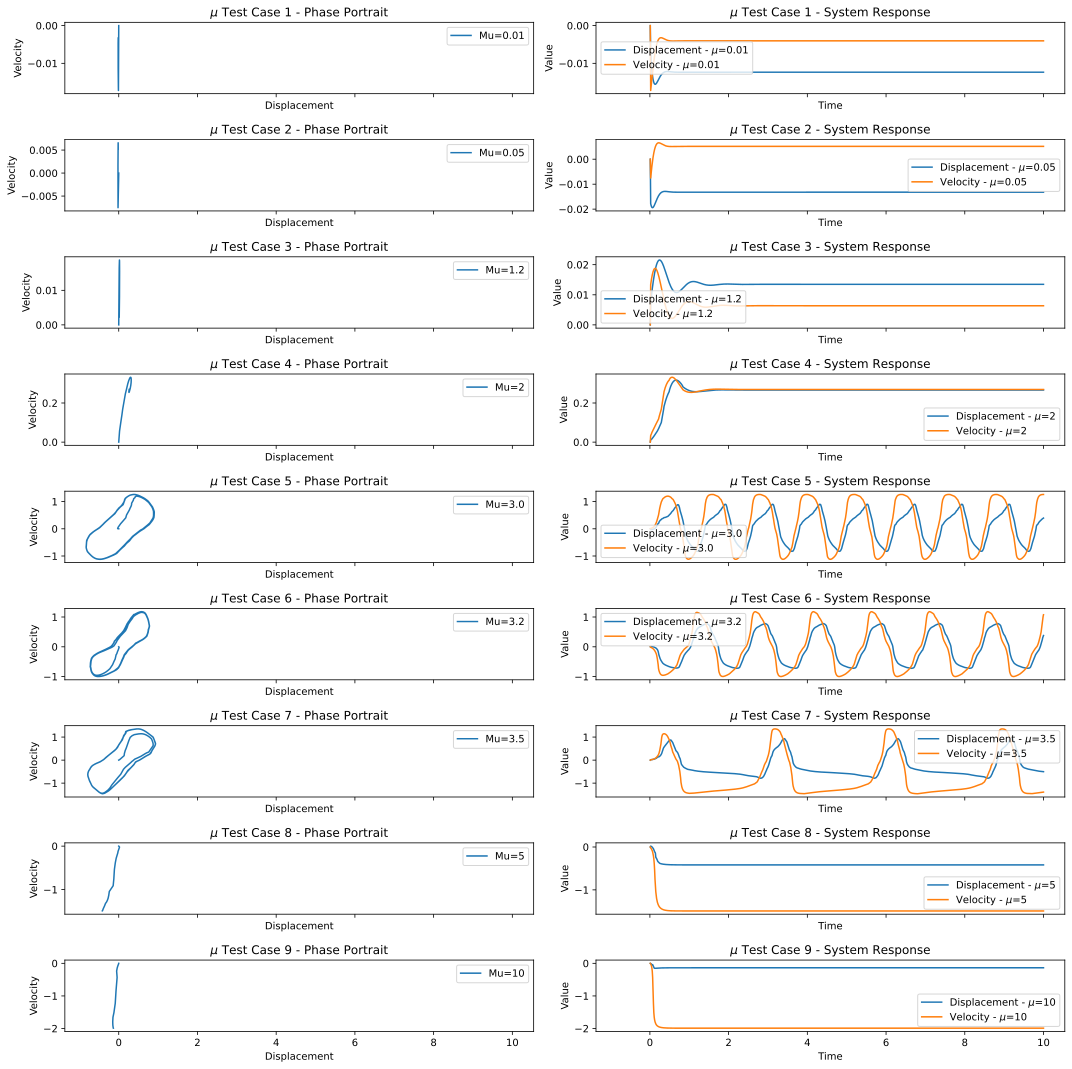

In [17]:

# Define the Van der Pol oscillator equations
def vanderpol(t, x, μ):
    dxdt = x[1]
    dydt = μ * (1 - x[0] ** 2) * x[1] - x[0]
    return [dxdt, dydt]

def run_mu_experiment(mu, sim_time=10.0, n_neurons=5000):
    # Nengo model
    model = nengo.Network()
    with model:
        # Define the ensemble with 2 dimensions for x and y
        ensemble = nengo.Ensemble(n_neurons=n_neurons, dimensions=2, neuron_type=nengo.LIFRate())

        # Create a function node to represent the Van der Pol equations
        vanderpol_node = nengo.Node(lambda t, x: vanderpol(t, x, mu), size_in=2, size_out=2, label="Van der Pol")
        nengo.Connection(ensemble, vanderpol_node, synapse=None)
        nengo.Connection(vanderpol_node, ensemble, synapse=0.1)  # Feedback connection with fixed synapse

        # Create probes to record data
        ensemble_probe = nengo.Probe(ensemble, synapse=0.0001)

    # Simulate the model with larger time step
    with nengo.Simulator(model, dt=0.01) as sim:
        sim.run(sim_time)

    return sim.trange(), sim.data[ensemble_probe]

# Define different values for mu through an array of values
mu_values = [0.01, 0.05, 1.2, 2, 3.0, 3.2, 3.5, 5, 10]

# Create subplots for each test case and for each case, have a phase portrait
fig, axes = plt.subplots(len(mu_values), 2, figsize=(15, 15), sharex=True)

for i, mu in enumerate(mu_values):
    # Run simulation for the current mu value
    time, result = run_mu_experiment(mu, n_neurons=50)  # Reduced number of neurons

    # Plot phase portrait
    axes[i, 0].plot(result[:, 0], result[:, 1], label=f'Mu={mu}')
    axes[i, 0].set_title(f'$\mu$ Test Case {i + 1} - Phase Portrait')
    axes[i, 0].set_xlabel('Displacement')
    axes[i, 0].set_ylabel('Velocity')
    axes[i, 0].legend()

    # Plot system response outputs
    axes[i, 1].plot(time, result[:, 0], label=f'Displacement - $\mu$={mu}')
    axes[i, 1].plot(time, result[:, 1], label=f'Velocity - $\mu$={mu}')
    axes[i, 1].set_title(f'$\mu$ Test Case {i + 1} - System Response')
    axes[i, 1].set_xlabel('Time')
    axes[i, 1].set_ylabel('Value')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


I cant really provide simulation images on how the system should look, but looking at this wonderful site (https://mathemanu.github.io/VanderPol.pdf), the outputs is consistent to that of the VdP. Due to some non linearities that are inconsistent within the nengo simulator (couldnt really figure out what i needed to tweak, probably the initial conditions), i guess my model didnt really simulate it to its entirety. But it somewhat works :)

(can I still please get 0.75 please i worked on this more than I should have. I also worked on this cause its within my research interests to use neurological systems to simulate control systems (contorls used on robots specifically) and so i did this bonus question lol)

I mean, who wouldnt wanna have Spot the robot (shown below) to say OWWWW everytime someone kicks it for control reactions

![ChessUrl](https://media.giphy.com/media/3xz2BJdx02IvIKwcMg/giphy.gif "robot")